In [196]:
### IMPORT DATA INTO WORKSPACE
setwd('~/Desktop/BT2103')
data <- read.table("card.csv",sep=",",skip=2,header=FALSE)

#Print first 5 lines of data 
print(head(data))

# Check for any NAs in the data 
print(sum(is.na(data))) #No NA values in the data

  V1     V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12   V13   V14   V15   V16   V17
1  1  20000  2  2  1 24  2  2 -1  -1  -2  -2  3913  3102   689     0     0
2  2 120000  2  2  2 26 -1  2  0   0   0   2  2682  1725  2682  3272  3455
3  3  90000  2  2  2 34  0  0  0   0   0   0 29239 14027 13559 14331 14948
4  4  50000  2  2  1 37  0  0  0   0   0   0 46990 48233 49291 28314 28959
5  5  50000  1  2  1 57 -1  0 -1   0   0   0  8617  5670 35835 20940 19146
6  6  50000  1  1  2 37  0  0  0   0   0   0 64400 57069 57608 19394 19619
    V18  V19   V20   V21  V22  V23  V24 V25
1     0    0   689     0    0    0    0   1
2  3261    0  1000  1000 1000    0 2000   1
3 15549 1518  1500  1000 1000 1000 5000   0
4 29547 2000  2019  1200 1100 1069 1000   0
5 19131 2000 36681 10000 9000  689  679   0
6 20024 2500  1815   657 1000 1000  800   0
[1] 0


In [197]:
### TIDY COLUMNS IN THE DATA FRAME
header <- scan("card.csv",sep=",",nlines=2,what=character())

# Remove unnecessary elements in the header vector so that the number of 
# elements in the header vector == number of columns in the data
print("Initial comparison of header length and no. of columns in data")
print(length(header) == ncol(data)) #FALSE
print(head(header,n=25))

# Remove first 25 elements in the header vector which are not applicable to 
# the column names
print("Final comparison of header length and no. of columns in data")
header = header[26:length(header)]
print(length(header) == ncol(data)) #TRUE
print(header)

#Assign header to dataframe 
names(data)=header

[1] "Initial comparison of header length and no. of columns in data"
[1] FALSE
 [1] "\357\273\277" "X1"           "X2"           "X3"           "X4"          
 [6] "X5"           "X6"           "X7"           "X8"           "X9"          
[11] "X10"          "X11"          "X12"          "X13"          "X14"         
[16] "X15"          "X16"          "X17"          "X18"          "X19"         
[21] "X20"          "X21"          "X22"          "X23"          "Y"           
[1] "Final comparison of header length and no. of columns in data"
[1] TRUE
 [1] "ID"                         "LIMIT_BAL"                 
 [3] "SEX"                        "EDUCATION"                 
 [5] "MARRIAGE"                   "AGE"                       
 [7] "PAY_0"                      "PAY_2"                     
 [9] "PAY_3"                      "PAY_4"                     
[11] "PAY_5"                      "PAY_6"                     
[13] "BILL_AMT1"                  "BILL_AMT2"                 
[15]

'data.frame':	30000 obs. of  25 variables:
 $ ID                        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ LIMIT_BAL                 : int  20000 120000 90000 50000 50000 50000 500000 100000 140000 20000 ...
 $ SEX                       : int  2 2 2 2 1 1 1 2 2 1 ...
 $ EDUCATION                 : int  2 2 2 2 2 1 1 2 3 3 ...
 $ MARRIAGE                  : int  1 2 2 1 1 2 2 2 1 2 ...
 $ AGE                       : int  24 26 34 37 57 37 29 23 28 35 ...
 $ PAY_0                     : int  2 -1 0 0 -1 0 0 0 0 -2 ...
 $ PAY_2                     : int  2 2 0 0 0 0 0 -1 0 -2 ...
 $ PAY_3                     : int  -1 0 0 0 -1 0 0 -1 2 -2 ...
 $ PAY_4                     : int  -1 0 0 0 0 0 0 0 0 -2 ...
 $ PAY_5                     : int  -2 0 0 0 0 0 0 0 0 -1 ...
 $ PAY_6                     : int  -2 2 0 0 0 0 0 -1 0 -1 ...
 $ BILL_AMT1                 : int  3913 2682 29239 46990 8617 64400 367965 11876 11285 0 ...
 $ BILL_AMT2                 : int  3102 1725 14027 48233 5670 57069 412

[1] 2 1

[1] 2 1 3 5 4 6 0

[1] 1.15



  0   5   6 
 14 280  51 

[1] 1 2 3 0

[1] 0.18


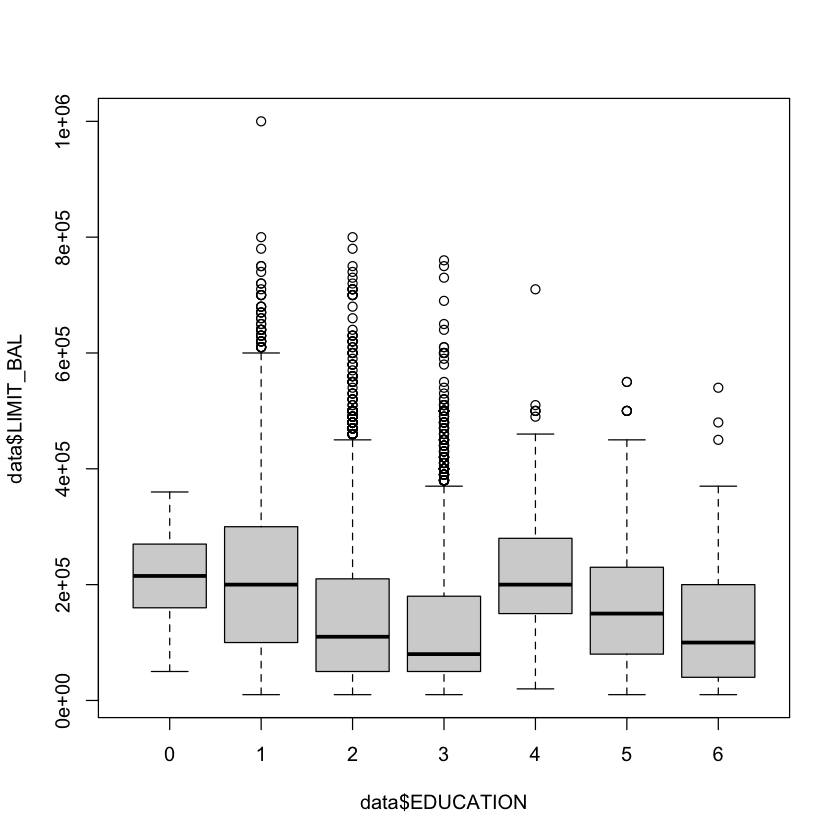

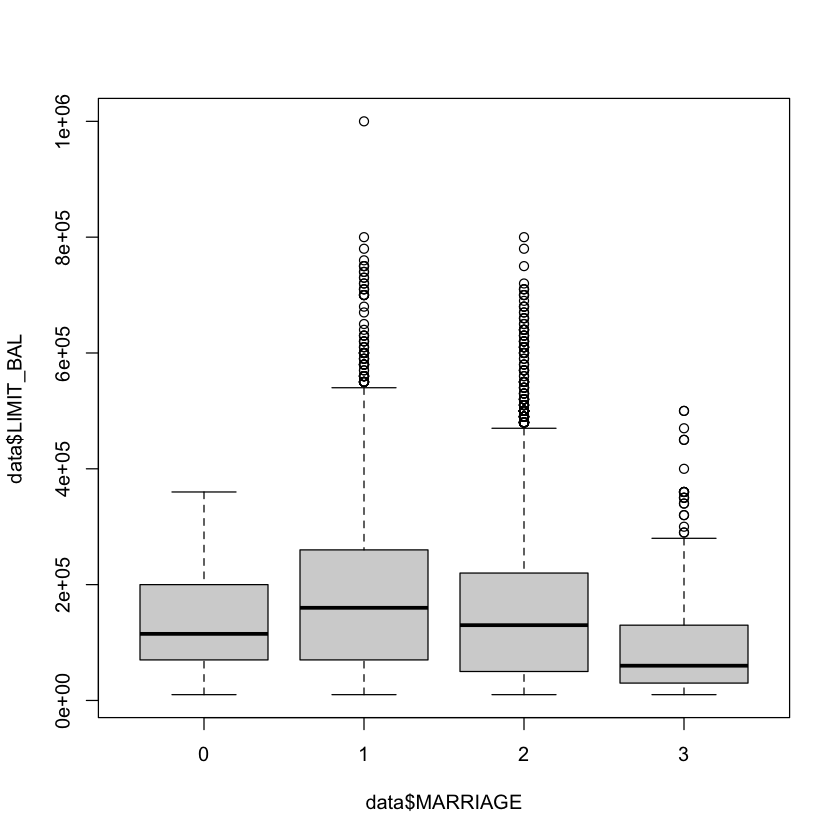

In [198]:
## CHECK CONSISTENCY OF DATA TYPES IN COLUMN AND DATA ENTRIES
 
#Check if data types in each column are appropriate

print(str(data))

#Categorical variables (Gender,Education,Marital Status,History of Past 
#Payments,default payment next month) have an int data type, which will be converted to factors and 
#renamed to match their representative values 

# Converting ints in SEX column to factors
unique(data$SEX) # SEX column consists of 1s and 2s only, which aligns with
# specifications

data$SEX = as.factor(data$SEX)
levels(data$SEX) = c("Male","Female")

# Converting ints in EDUCATION column to factors
unique(data$EDUCATION) #Consists of ints ranging from 0 to 6, but only 1 - 4
# was specified as valid data entries 

other_edu_categories = data[which(data$EDUCATION %in% c(0,5:6)),]
percent_data_other_edu_categories = nrow(other_edu_categories)/nrow(data)*100
print(percent_data_other_edu_categories) #Outlier education categories make up
# only 1.15% percent of the total dataset, hence removing entries from these 
#categories is plausible as it will not lead to a significant loss of data 
boxplot(data$LIMIT_BAL~data$EDUCATION) #median limit balance for groups 0 and 
# 5 are relatively high compared to the other groups. however, they do not 
#have extremely high limit balances that could skew or influence the data to a 
# large extent.
table(other_edu_categories$EDUCATION) #group 5 has by far the most number of 
# entries amongst the outlier groups (280)

#(need to confirm) to keep or remove outlier groups in the dataset? --> afterwards
# work on converting these entries to factors 


# Converting ints in MARRIAGE column to factors
unique(data$MARRIAGE) # Consists of int values from 0 to 3, with 0 being the 
#outlier category
other_marriage_category = data[which(data$MARRIAGE == 0),]
percent_data_other_marriage_category = 100*nrow(other_marriage_category)/nrow(data)
print(percent_data_other_marriage_category) #Marriage category of 0 consists
# of 0.18% of the data 
boxplot(data$LIMIT_BAL~data$MARRIAGE) # 0 categrory does not have any significant 
# outliers for limit balance that could skew or influence the data to a 
# large extent, possible to remove 

#(need to confirm) to keep or remove outlier groups in the dataset? --> afterwards
# work on converting these entries to factors 

# Converting ints in HISTORY OF PAST PAYMENTS columns to factors
for (i in 7:12) {
    data[,i] = as.factor(data[,i])
}

# Convert default payment next month column to factor 
data[,length(data)]= as.factor(data[,length(data)])
levels(data[,length(data)]) = c("No","Yes")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10000   50000  140000  167484  240000 1000000 


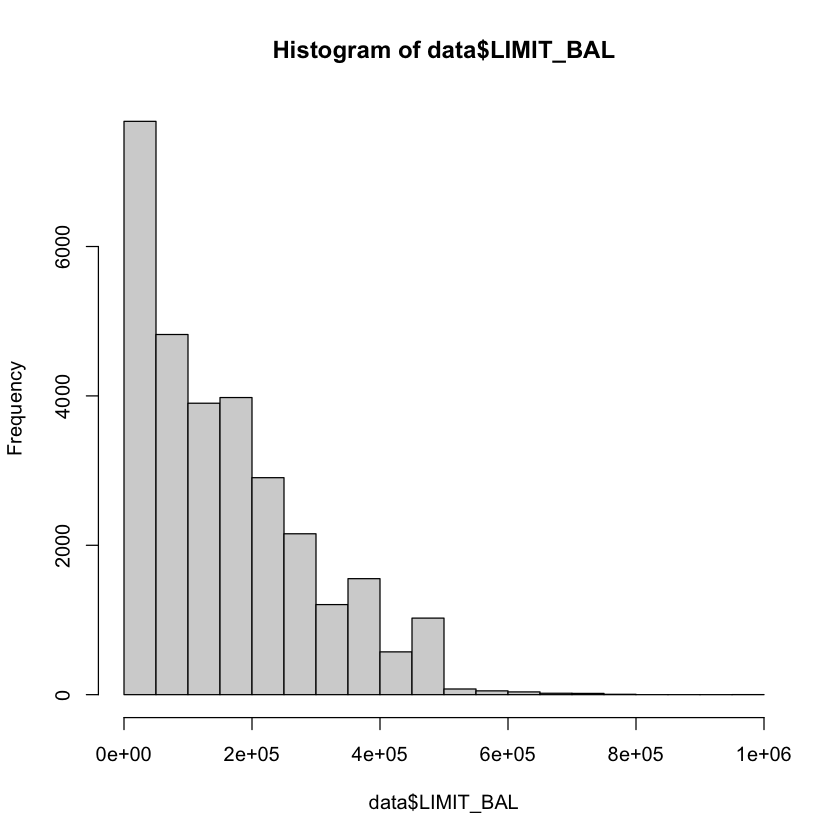

[1] 167


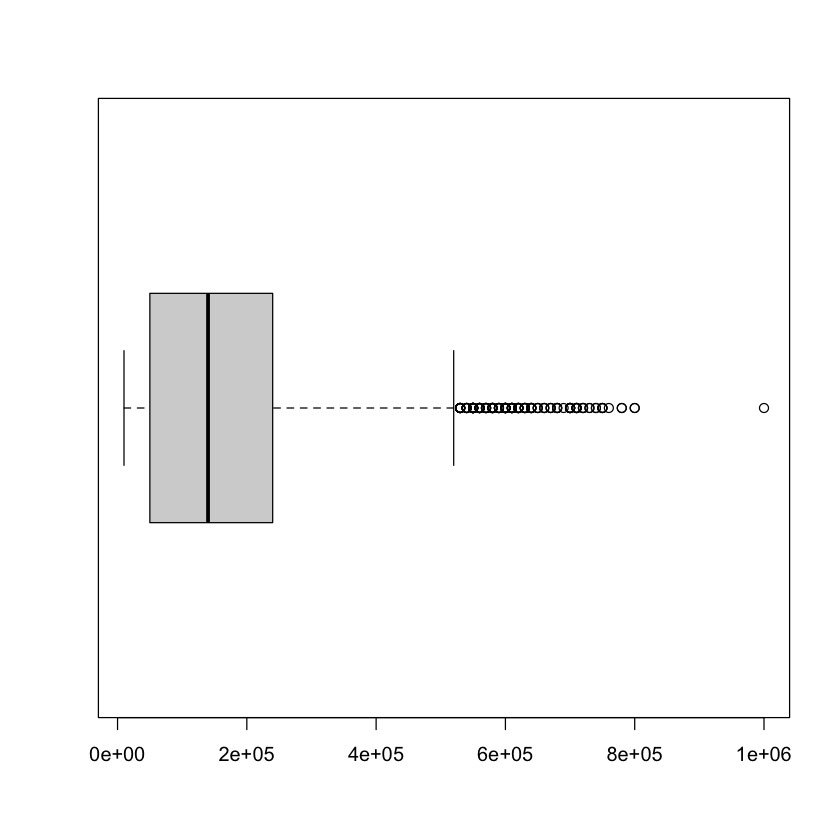

[1] 1



   No   Yes 
77.88 22.12 

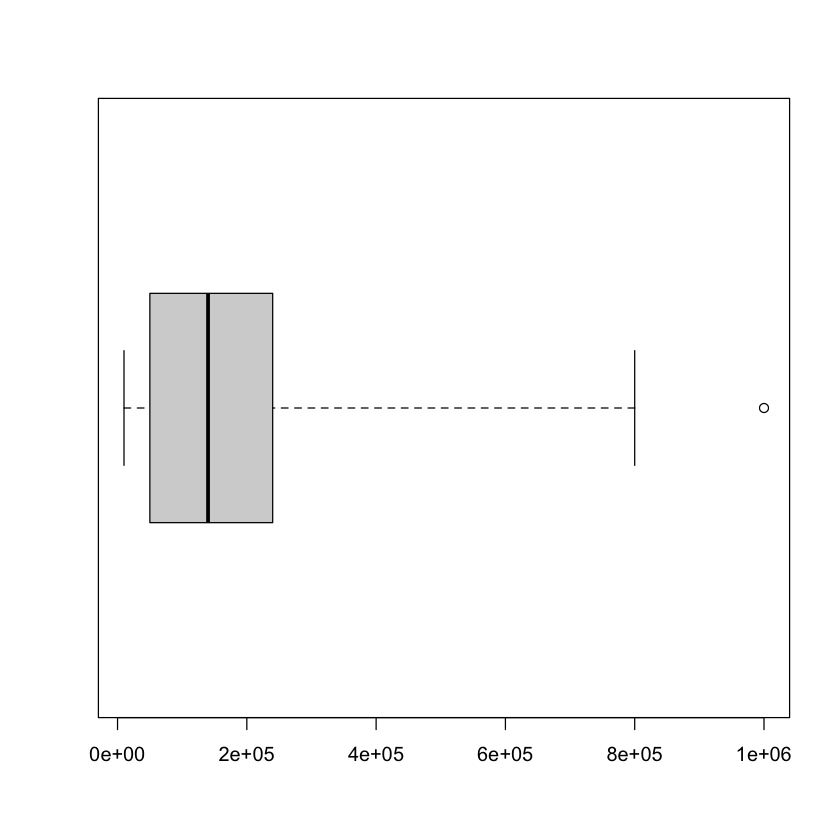

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.00   28.00   34.00   35.49   41.00   79.00 

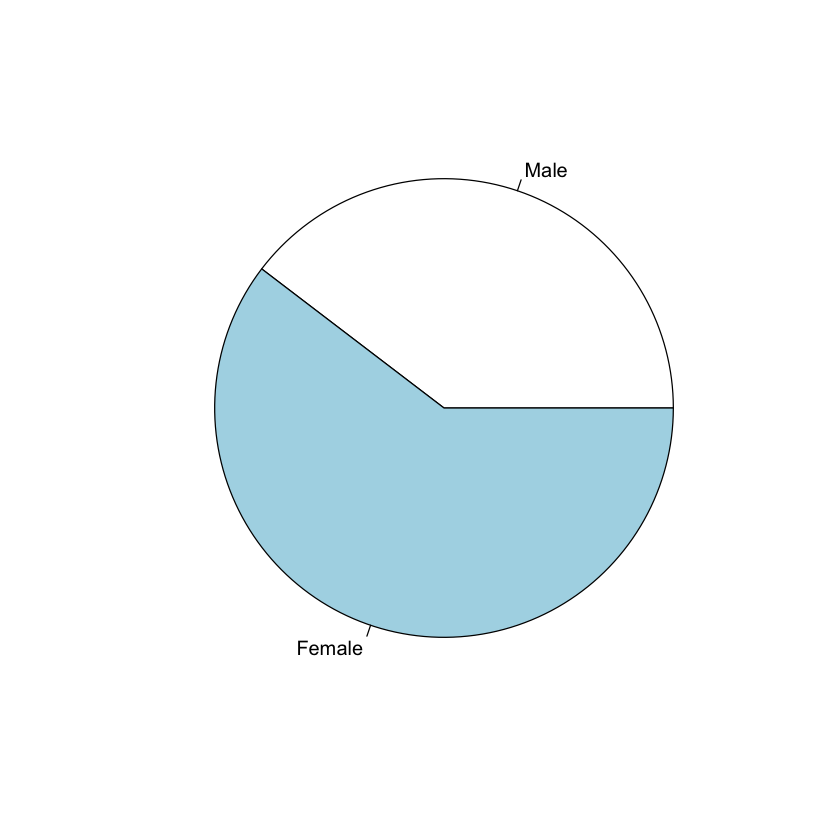

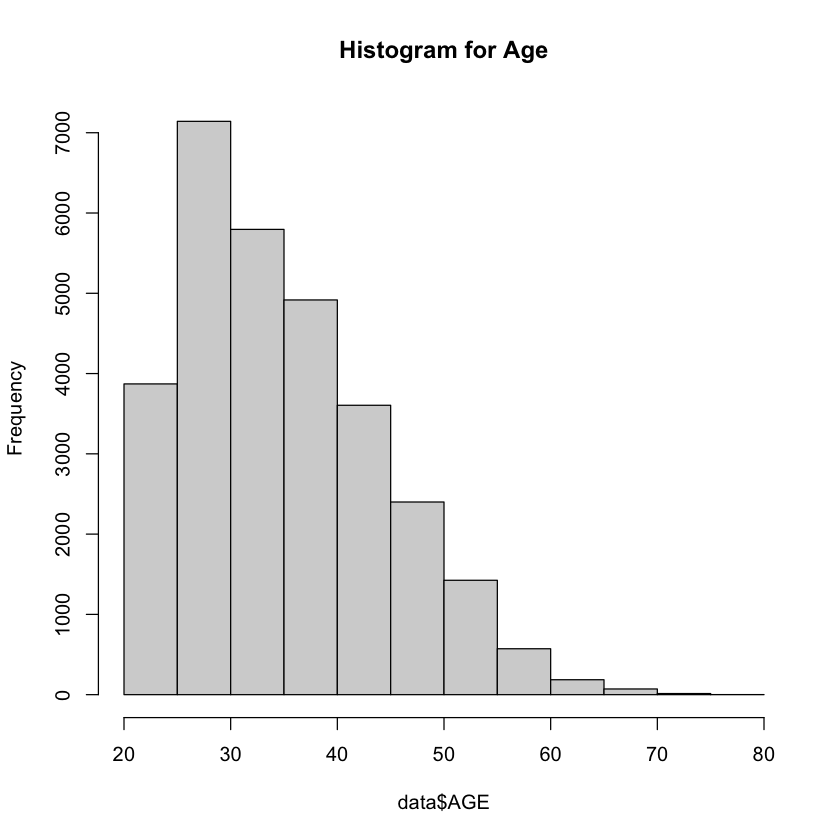

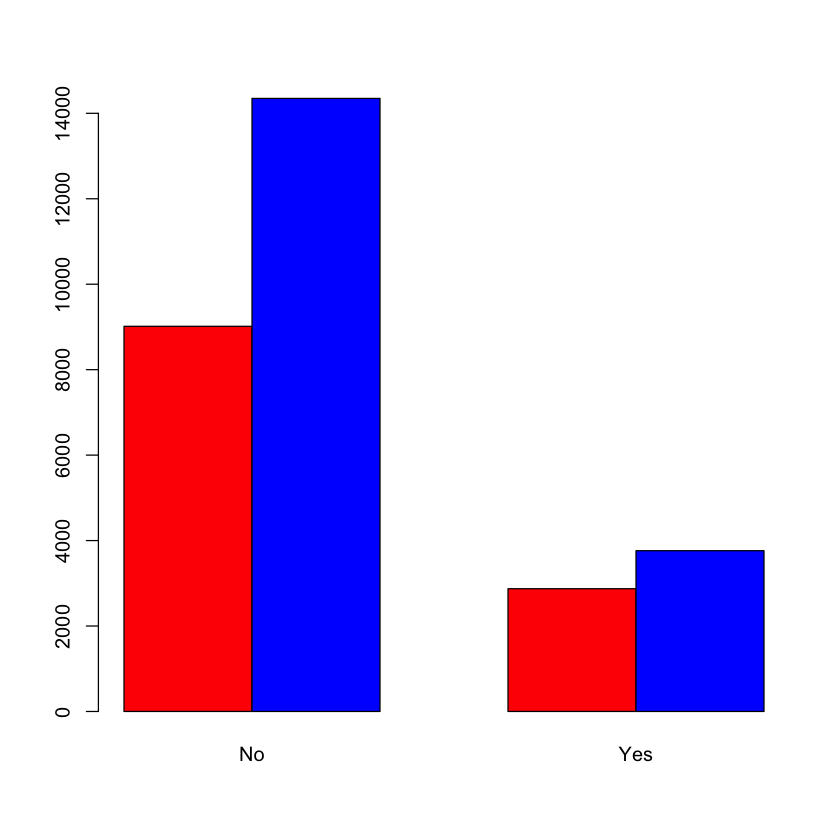

In [199]:
## EXPLORATORY DATA ANALYSIS --> not complete. also need to change after 
## restructuring data above

#summary stats for limit balance 
print(summary(data$LIMIT_BAL)) #Minimum limit balance of $10,000 and maximum 
# limit balnce of $1 million
hist(data$LIMIT_BAL) #Distribution of limit balance is heavily right-skewed
limit_1.5_bp = boxplot(data$LIMIT_BAL,horizontal =T)
print(length(limit_1.5_bp$out)) # 167 mild outliers that fall outside 1.5 IQR range
limit_3_bp = boxplot(data$LIMIT_BAL,horizontal = T, range = 3)
print(length(limit_3_bp$out)) # 1 extreme outlier that falls outside 3IQR range

#summary stats for whether clients will default payment next month
prop.table(table(data[,length(data)]))*100 #77.88% of clients will not 
# default on payments next month

#summary stats for gender --> add labels
pie(table(data$SEX))

# summary stats for age 
summary(data$AGE) #Min age is 21, median 34, mean 35.49 and max is 79. 
# median < mean, thus data for age is positively skewed 
hist(data$AGE,main = "Histogram for Age") #most customers aged between 25-30.
# clients are mostly young adults or middle aged 

# RS btw other variables and whether a client defaults on payment --> needs
#refinement

#gender 
barplot(table(data$SEX,data$`default payment next month`),beside = T, 
col =c("red","blue"))
